In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from scipy.stats import linregress
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.multitest import multipletests
from matplotlib import rcParams
from matplotlib import cm
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import ttest_ind

file_path = "/Users/gechlangtang/Documents/University of Washington/IPHG Thesis/Data/Moisture_and_cell_count.xlsx" 
moisture_data = pd.read_excel(file_path)

moisture_data

,Cohort,Individual,Timepoint,Average cell count (per gram of frozen feces),Moisture content (%),Observed richness (#genera)
0,Study cohort,SC01,NaN,1.897660e+11,NaN,51.0
1,Study cohort,SC02,NaN,1.484284e+11,79.11,50.0
2,Study cohort,SC03,NaN,1.173566e+11,49.87,78.0
3,Study cohort,SC04,NaN,1.527821e+11,74.48,73.0
4,Study cohort,SC05,NaN,1.059558e+11,64.40,66.0
...,...,...,...,...,...,...
221,Longitudinal cohort,LC19,3.0,6.719243e+10,71.83,NaN
222,Longitudinal cohort,LC19,4.0,9.693878e+10,78.13,NaN
223,Longitudinal cohort,LC19,5.0,4.214047e+10,77.13,NaN
224,Longitudinal cohort,LC19,6.0,4.495968e+10,81.82,NaN


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                             OLS Regression Results                             
Dep. Variable:     Moisture content (%)   R-squared:                       0.140
Model:                              OLS   Adj. R-squared:                  0.136
Method:                   Least Squares   F-statistic:                     35.99
Date:                  Sun, 17 Nov 2024   Prob (F-statistic):           8.04e-09
Time:                          09:26:38   Log-Likelihood:                -748.61
No. Observations:                   223   AIC:                             1501.
Df Residuals:                       221   BIC:                             1508.
Df Model:                             1                                         
Covariance Type:     

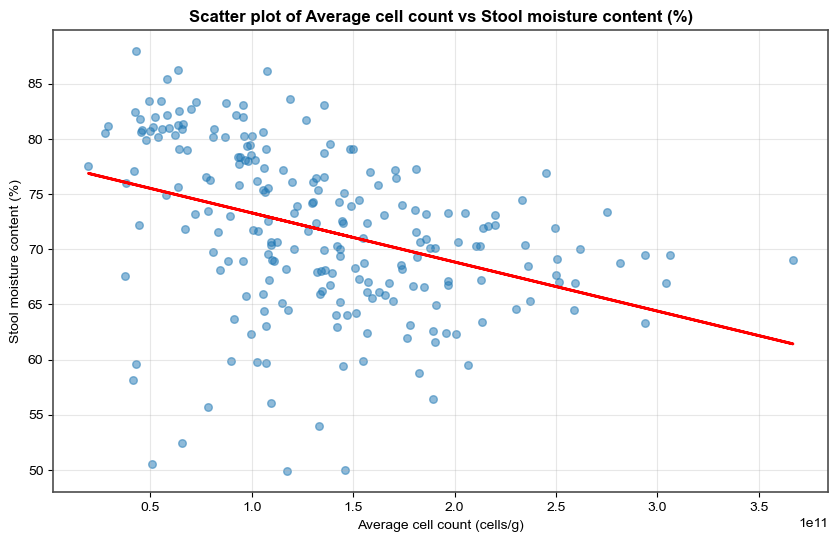

In [5]:
cleaned_data = moisture_data.dropna(subset=['Average cell count (per gram of frozen feces)', 'Moisture content (%)'])

x = cleaned_data['Average cell count (per gram of frozen feces)']

X = sm.add_constant(x)

y = cleaned_data['Moisture content (%)']

model = sm.OLS(y, X).fit()

regression_summary = model.summary()
print(regression_summary)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.figure(figsize=(10, 6))

plt.scatter(cleaned_data['Average cell count (per gram of frozen feces)'], cleaned_data['Moisture content (%)'], alpha=0.5, s=30)
plt.plot(cleaned_data['Average cell count (per gram of frozen feces)'], model.fittedvalues, color='red', linewidth=2)
plt.xlabel('Average cell count (cells/g)')
plt.ylabel('Stool moisture content (%)')
plt.title('Scatter plot of Average cell count vs Stool moisture content (%)', fontweight='bold')
plt.grid(visible=True, alpha=0.3)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(1.2) 
    
#plt.savefig('scatterplot_cellcountvsmoisture.png', dpi=300, bbox_inches='tight', format='png') 
plt.show()

In [2]:
file_path = "/Users/gechlangtang/Documents/University of Washington/IPHG Thesis/Data/Supplemental_table9.xlsx" 
Metacardis_df = pd.read_excel(file_path, index_col = 0)

Metacardis_df.head()

,Status,Read count,High quality read count,High quality clean read count,Homo sapiens GRCh37.p10 may2014 excluded read count,Bos Taurus 4.6.1 may2014 excluded read count,A thaliana may2014 excluded read count,Mapped read count,Percentage of mapped read count,Unique mapped read count,Percentage of unique mapped read count,Microbial load,MGS count,Gene count,BMI (kg/m²),Gender,Age (years),Waist circumference (cm)
ID,,,,,,,,,,,,,,,,,,
x14MCx2088,HC275,22701641.0,21272456.0,21266684.0,5766.0,12.0,11.0,14838284.0,69.772438,13393155.0,62.977167,1.519685e+11,369.0,835455.4,21.22839,Female,56,71.0
x14MCx1929,HC275,21528200.0,20349954.0,20276835.0,73070.0,97.0,48.0,14240737.0,70.231557,12865029.0,63.446928,2.303468e+11,437.0,908200.1,23.89748,Male,66,81.5
x14MCx1616,HC275,23237795.0,21475583.0,21115176.0,360311.0,497.0,64.0,15255665.0,72.249765,13554237.0,64.191921,1.331288e+11,272.0,678545.5,19.55902,Female,63,69.7
x14MCx1706,HC275,22579768.0,21236137.0,21224377.0,11734.0,11.0,26.0,15928331.0,75.047343,14159012.0,66.711084,8.306878e+10,441.0,872581.6,23.59283,Female,52,77.7
x14MCx2468,HC275,23075585.0,21265012.0,21243405.0,21537.0,43.0,69.0,15780949.0,74.286344,13936699.0,65.604827,8.150289e+10,289.0,729706.6,23.91582,Male,62,85.5


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:         Microbial load   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.824
Date:                Sun, 17 Nov 2024   Prob (F-statistic):            0.00522
Time:                        09:27:06   Log-Likelihood:                -43974.
No. Observations:                1680   AIC:                         8.795e+04
Df Residuals:                    1678   BIC:                         8.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust  

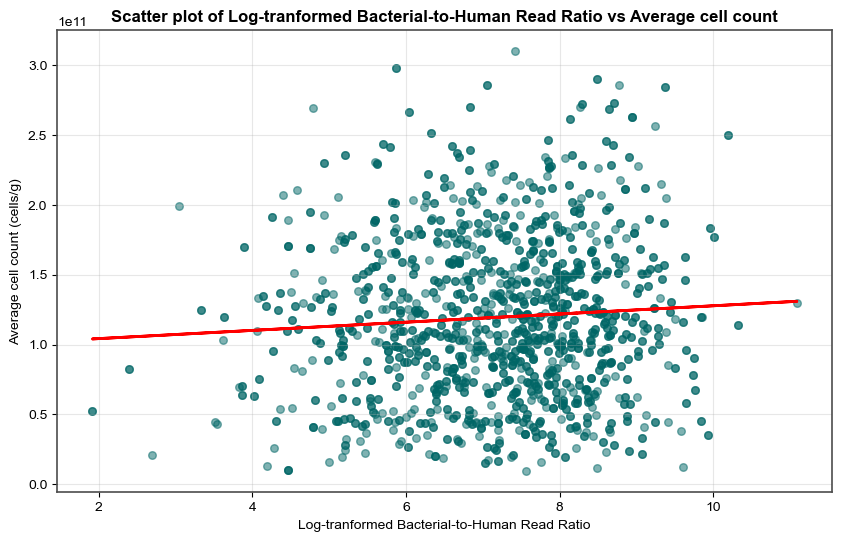

In [6]:
numeric_cols = Metacardis_df.select_dtypes(include=[np.number]).columns
Metacardis_df.replace([np.inf, -np.inf], np.nan, inplace=True)
Metacardis_df.dropna(inplace=True)

Metacardis_df.loc[:, 'B:H_read_ratio'] = Metacardis_df['High quality clean read count'] / Metacardis_df['Homo sapiens GRCh37.p10 may2014 excluded read count']
Metacardis_df.loc[:, 'Log_B:H_read_ratio'] = np.log(Metacardis_df['B:H_read_ratio'] + 1e-9)

x = Metacardis_df['Log_B:H_read_ratio']
y = Metacardis_df['Microbial load']
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

plt.figure(figsize=(10, 6))

plt.scatter(Metacardis_df['Log_B:H_read_ratio'], Metacardis_df['Microbial load'], color='#006666', alpha=0.5, s=30)
plt.xlabel('Log-tranformed Bacterial-to-Human Read Ratio')
plt.ylabel('Average cell count (cells/g)')
plt.plot(Metacardis_df['Log_B:H_read_ratio'], model.fittedvalues, color='red', linewidth=2)
plt.title('Scatter plot of Log-tranformed Bacterial-to-Human Read Ratio vs Average cell count', fontweight='bold')
plt.grid(visible=True, alpha=0.3)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(1.2) 

plt.show()

In [3]:
file_path = "/Users/gechlangtang/Documents/University of Washington/IPHG Thesis/Data/Gut_puzzle_data.xlsx" 
Gut_puzzle = pd.read_excel(file_path, index_col = 0)

Gut_puzzle.head()

,interventions,stool_weight,bristol,temperature_celsius,Bacterial Read Count,Human Read Count,B:H read ratio
donor_id,,,,,,,
7102,no,27.50,4,22.4,24976025,10838,2304.486529
7101,no,82.15,4,20.2,13683766,2812,4866.204125
7103,no,207.80,5,23.9,48047801,2512,19127.309315
7105,no,77.80,3,25.5,34211109,6394,5350.501877
7106,no,75.50,4,25.3,34462393,3108,11088.286036


In [7]:
Gut_puzzle['Log_B:H_read_ratio'] = np.log(Gut_puzzle['B:H read ratio'] + 1e-9)

X = Gut_puzzle['Log_B:H_read_ratio']
y = Gut_puzzle['bristol'] 

model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.421332
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
                             OrderedModel Results                             
Dep. Variable:                bristol   Log-Likelihood:                -55.432
Model:                   OrderedModel   AIC:                             122.9
Method:            Maximum Likelihood   BIC:                             132.8
Date:                Sun, 17 Nov 2024                                         
Time:                        09:27:28                                         
No. Observations:                  39                                         
Df Residuals:                      33                                         
Df Model:                           1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


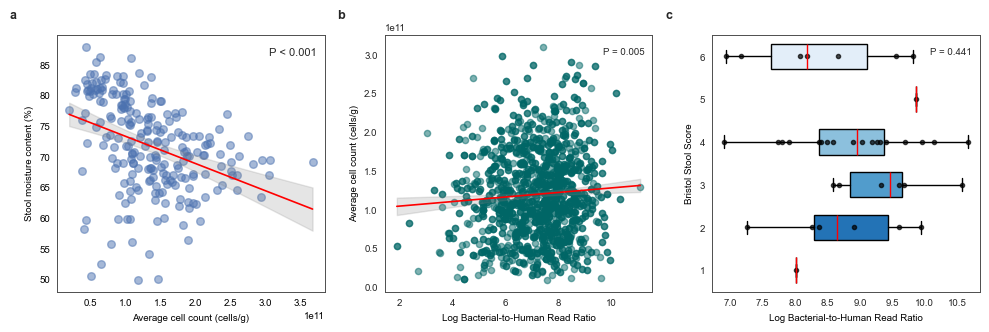

In [61]:
cleaned_data = moisture_data.dropna(subset=['Average cell count (per gram of frozen feces)', 'Moisture content (%)'])

x = cleaned_data['Average cell count (per gram of frozen feces)']
X = sm.add_constant(x)
y = cleaned_data['Moisture content (%)']
model = sm.OLS(y, X).fit()

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = sm.add_constant(x_pred)
predictions = model.get_prediction(X_pred)
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot 1
axes[0].scatter(cleaned_data['Average cell count (per gram of frozen feces)'],
                cleaned_data['Moisture content (%)'], alpha=0.5, s=30)
axes[0].plot(x_pred, predicted_means, color='red', linewidth=1.2)
axes[0].fill_between(x_pred, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='95% CI')
axes[0].set_xlabel('Average cell count (cells/g)', **font_label)
axes[0].set_ylabel('Stool moisture content (%)', **font_label)
axes[0].tick_params(axis='both', labelsize=font_ticks['fontsize'], colors=font_ticks['color'], length=0, pad=5)  # Adjust padding
axes[0].yaxis.set_tick_params(pad=5)  # Extra padding for y-axis
axes[0].text(0.97, 0.95, 'P < 0.001', transform=axes[0].transAxes, fontsize=8, verticalalignment='top', horizontalalignment='right')
axes[0].grid(False)

for spine in axes[0].spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(0.7)

# Second subplot
x = Metacardis_df['Log_B:H_read_ratio']
y = Metacardis_df['Microbial load']
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()

x_pred = np.linspace(x.min(), x.max(), 100)
x_pred_with_const = sm.add_constant(x_pred)
predictions = model.get_prediction(x_pred_with_const)
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

axes[1].scatter(Metacardis_df['Log_B:H_read_ratio'], Metacardis_df['Microbial load'], color='#006666', alpha=0.5, s=20)
axes[1].plot(x_pred, predicted_means, color='red', linewidth=1.2, label='Regression line')
axes[1].fill_between(x_pred, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='95% CI')
axes[1].set_xlabel('Log Bacterial-to-Human Read Ratio', **font_label)
axes[1].set_ylabel('Average cell count (cells/g)', **font_label)
axes[1].tick_params(axis='both', labelsize=font_ticks['fontsize'], length=0, pad=5)  # Adjust padding
axes[1].yaxis.set_tick_params(pad=5)
axes[1].text(0.97, 0.95, 'P = 0.005', transform=axes[1].transAxes, fontsize=7, verticalalignment='top', horizontalalignment='right')
axes[1].grid(False)

for spine in axes[1].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

# Third subplot: Box plot
x = Gut_puzzle['Log_B:H_read_ratio']
y = Gut_puzzle['bristol']
colors = cm.Blues(np.linspace(0.9, 0.1, len(np.unique(y))))  # Adjust color range

for i, val in enumerate(sorted(y.unique())):
    axes[2].boxplot(x[y == val], vert=False, patch_artist=True, 
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='red'), 
               positions=[i + 1], widths=0.6)

for i, val in enumerate(sorted(y.unique()), start=1):
    axes[2].plot(x[y == val], [i] * len(x[y == val]), 'o', color='black', alpha=0.7, markersize=3)

axes[2].set_xlabel('Log Bacterial-to-Human Read Ratio', **font_label)
axes[2].set_ylabel('Bristol Stool Score', **font_label)
axes[2].set_xticks(np.arange(7, 11, 0.5))
axes[2].tick_params(axis='both', labelsize=font_ticks['fontsize'], length=0, pad=5)  # Adjust padding
axes[2].yaxis.set_tick_params(pad=5)
axes[2].text(0.97, 0.95, 'P = 0.441', transform=axes[2].transAxes, fontsize=7, verticalalignment='top', horizontalalignment='right')
axes[2].grid(False)

# Adding "a", "b", and "c" labels
axes[0].text(-0.15, 1.1, 'a', transform=axes[0].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[1].text(-0.15, 1.1, 'b', transform=axes[1].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[2].text(-0.15, 1.1, 'c', transform=axes[2].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')

for spine in axes[2].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

plt.tight_layout()
plt.show()


In [ ]:
Gut_puzzle['Total read'] = Gut_puzzle['Human Read Count'] + Gut_puzzle['Bacterial Read Count'] + Gut_puzzle['Cellular organisms'] + Gut_puzzle['Eukaryota'] + Gut_puzzle['Archaea'] + Gut_puzzle['Viruses']  

Gut_puzzle['Human read fraction'] = Gut_puzzle['Human Read Count']/Gut_puzzle['Total read']

Gut_puzzle['log_Human_read_fraction'] = np.log(Gut_puzzle['Human read fraction'] + 1e-9)

x = Gut_puzzle['log_Human_read_fraction']
Y = Gut_puzzle['bristol']  

model_fraction = OrderedModel(Y, x, distr='logit')
result_fraction = model_fraction.fit(method='bfgs')

print(result_fraction.summary())

In [ ]:
x = Gut_puzzle['log_Human_read_fraction']
y = Gut_puzzle['bristol']

fig, ax = plt.subplots(figsize=(3.5, 3.5))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 6, 'color': 'black'}

plt.rcParams.update({'xtick.labelsize': 6, 'ytick.labelsize': 6})

colors = cm.Greens(np.linspace(0.8, 0.1, len(y.unique())))

positions = range(1, len(y.unique()) + 1)  
for i, val in enumerate(sorted(y.unique())):
    ax.boxplot(
        x[y == val],
        positions=[positions[i]],
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor=colors[i], color='black'),
        medianprops=dict(color='red'),
        widths=0.6,
    )
    ax.plot(x[y == val], [positions[i]] * len(x[y == val]), 'o', color='black', alpha=0.7, markersize=3)

ax.set_xlabel('Log Human Read Fraction', fontsize=7)
ax.set_ylabel('Bristol Stool Score', fontsize=7)

step_size = 1.0  
min_val, max_val = np.floor(min(x)), np.ceil(max(x))  
ax.set_xticks(np.arange(min_val, max_val + step_size, step_size))

plt.grid(False)

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

ax.text(0.02, 0.95, "P = 0.418", transform=ax.transAxes, fontsize=7, color='black', ha='left', va='top')

#plt.savefig('Supplementary_figure1.2.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

In [15]:
file_path = "/Users/gechlangtang/Documents/University of Washington/IPHG Thesis/Data/Cow_metagenomic_reads.xlsx" 
Cow_df = pd.read_excel(file_path)

Cow_df.head()

,Sample_ID,Host_Cell_Count_per_ml_(SCC),Total_reads,Bos_taurus_reads,Bacterial_reads_excluding_spike-in_species,Staphylococcus_aureus_reads,Streptococcus_uberis_reads,Imechtella_halotolerans_reads_(spike-in),Allobacillus_haltolerans_reads_(spike-in)
0,LAA401,248,8082946,6573263,1432.042743,0,133,1241,1084
1,LAA402,214,12543054,10463635,758.742337,16,7,1670,1759
2,LAA403,245,9028052,7349355,1024.889200,6,486,1225,1298
3,LAA405,86,18539936,15553579,472.690562,42,1,15784,14109
4,LAA406,42,14105114,11713361,322.566660,32,2,15929,18210


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                  OLS Regression Results                                 
Dep. Variable:     Log_endogenous:spike-in_ratio   R-squared:                       0.784
Model:                                       OLS   Adj. R-squared:                  0.784
Method:                            Least Squares   F-statistic:                     1392.
Date:                           Sun, 17 Nov 2024   Prob (F-statistic):          1.36e-129
Time:                                   13:23:02   Log-Likelihood:                -364.00
No. Observations:                            385   AIC:                             732.0
Df Residuals:                                383   BIC:                             739.9
Df Model:                     

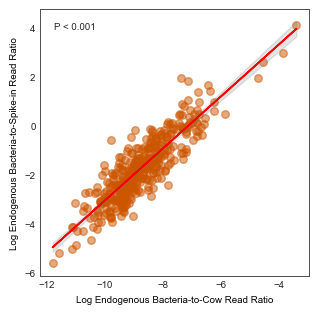

In [62]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

Cow_df.loc[:, 'B:C_read_ratio'] = Cow_df['Bacterial_reads_excluding_spike-in_species'] / Cow_df['Bos_taurus_reads']
Cow_df.loc[:, 'Log_B:C_read_ratio'] = np.log(Cow_df['B:C_read_ratio'] + 1e-9)
Cow_df.loc[:, 'total_spike-in_reads'] = Cow_df['Imechtella_halotolerans_reads_(spike-in)'] + Cow_df['Allobacillus_haltolerans_reads_(spike-in)']
Cow_df.loc[:, "endogenous:spike-in_ratio"] = Cow_df['Bacterial_reads_excluding_spike-in_species'] / Cow_df['total_spike-in_reads']
Cow_df.loc[:, 'Log_endogenous:spike-in_ratio'] = np.log(Cow_df['endogenous:spike-in_ratio'] + 1e-9)

x = Cow_df['Log_B:C_read_ratio']
y = Cow_df['Log_endogenous:spike-in_ratio']
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

plt.figure(figsize=(3.46, 3.46))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

plt.rcParams.update({'xtick.labelsize': 7, 'ytick.labelsize': 7})

x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = sm.add_constant(x_pred)
predictions = model.get_prediction(X_pred)
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

plt.scatter(Cow_df['Log_B:C_read_ratio'], Cow_df['Log_endogenous:spike-in_ratio'], color='#CC5500', alpha=0.5, s=30)
plt.xlabel('Log Endogenous Bacteria-to-Cow Read Ratio', **font_label)
plt.ylabel('Log Endogenous Bacteria-to-Spike-in Read Ratio', **font_label)
plt.plot(Cow_df['Log_B:C_read_ratio'], model.fittedvalues, color='red', linewidth=1.2)
plt.plot(x_pred, predicted_means, color='red', linewidth=1.2, label='Regression line')
plt.fill_between(x_pred, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='95% CI')
plt.text(0.05, 0.95, 'P < 0.001', transform=plt.gca().transAxes, fontsize=7, 
         verticalalignment='top', horizontalalignment='left')
plt.grid(False)

plt.tick_params(axis='both', length=0)  # Set tick length to 0 to hide tick marks

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(0.7) 

#plt.savefig('figure4.png', dpi=300, bbox_inches='tight', format='png')  # Use 'pdf' or 'eps' or 'ai' for vector formats

plt.show()


In [26]:
file_path = "/Users/gechlangtang/Documents/University of Washington/IPHG Thesis/Data/Ratio_read.xlsx" 
recovery_df = pd.read_excel(file_path, index_col = 0)

recovery_df = recovery_df.reset_index() 

recovery_df.head()

,Sample ID,Time point,Trimmed read,Bacterial read,Human read,B:H read ratio
0,ERAS1_Dag0,Day 0,71159570,71126043,33527,2121.455633
1,ERAS1_Dag180,Day 180,81899919,81865398,34521,2371.466586
2,ERAS1_Dag42,Day 42,101568068,101446863,121205,836.985793
3,ERAS1_Dag8,Day 8,93722862,93553066,169796,550.973321
4,ERAS10_Dag0,Day 0,64636151,64597106,39045,1654.427097


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


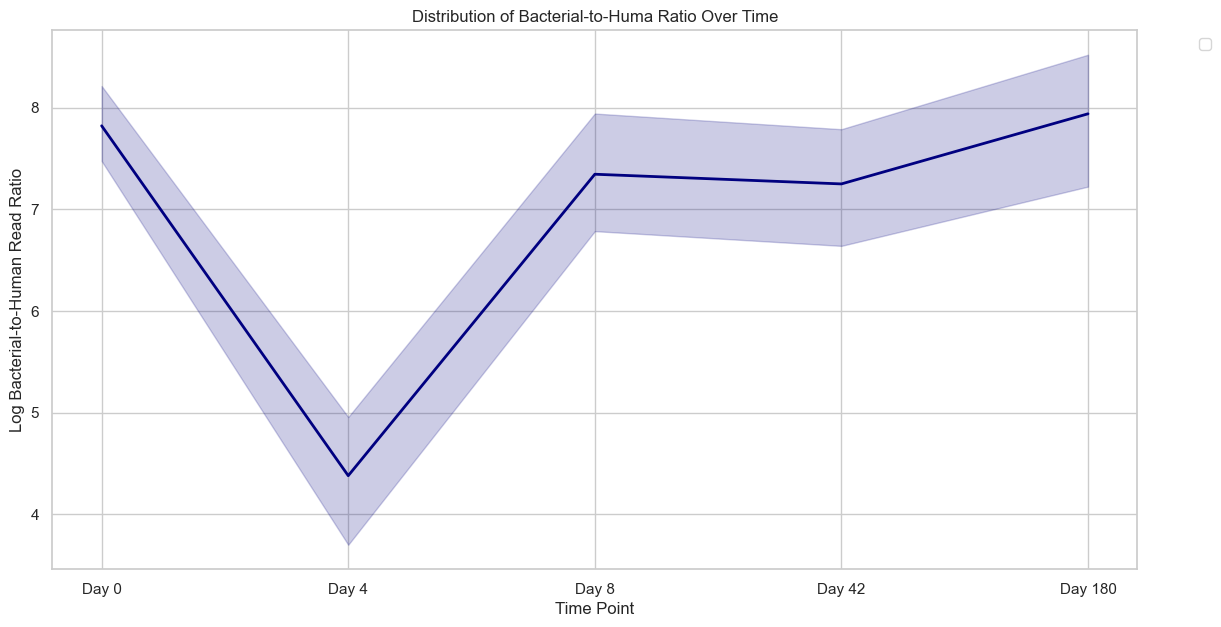

In [27]:
recovery_df['Log_B:H read ratio'] = np.log(recovery_df['B:H read ratio'] + 1e-9)

recovery_df['Time point'] = pd.Categorical(recovery_df['Time point'], categories=["Day 0", "Day 4", "Day 8", "Day 42", "Day 180"], ordered=True)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=recovery_df, x="Time point", y='Log_B:H read ratio', linewidth=2, color='#000080')

plt.title('Distribution of Bacterial-to-Huma Ratio Over Time')
plt.xlabel('Time Point')
plt.ylabel('Log Bacterial-to-Human Read Ratio')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
baseline_data = recovery_df[recovery_df['Time point'] == "Day 0"]['B:H read ratio']

time_points = ["Day 4", "Day 8", "Day 42", "Day 180"]

# Running t-tests for each time point compared to the baseline
p_values = []
for time_point in time_points:
    current_data = recovery_df[recovery_df['Time point'] == time_point]['B:H read ratio']
    t_stat, p_value = stats.ttest_ind(baseline_data, current_data, equal_var=False)
    p_values.append(p_value)

significance_labels = []
for p in p_values:
    if p < 0.001:
        significance_labels.append('***')
    elif p < 0.01:
        significance_labels.append('**')
    elif p < 0.05:
        significance_labels.append('*')
    else:
        significance_labels.append('')

results_df = pd.DataFrame({
    'Time Point': time_points,
    'P-Value': p_values,
    'Significant': significance_labels
})

print(results_df)

  Time Point   P-Value Significant
0      Day 4  0.000978         ***
1      Day 8  0.601923            
2     Day 42  0.292578            
3    Day 180  0.269004            


In [21]:
file_path = "/Users/gechlangtang/Documents/University of Washington/IPHG Thesis/Data/Mouse_metagenomic_read_data.xlsx" 
Mouse_df = pd.read_excel(file_path)

Mouse_df.head()

,Treatment,Days,Cage,tag,Copy no./ul,Total_Biomass_plant2,Bacterial_read,Mouse_read,B:M_ratio
0,BA,0,1,BA1D1,3.748279e+08,4215.544267,81306.0,70015.0,1.161265
1,BA,3,1,BA1D3,1.023358e+06,3.108465,5454.0,1312426.0,0.004156
2,BA,6,1,BA1D6,NaN,0.907225,1561.0,1041422.0,0.001499
3,BA,7,1,BA1D7,NaN,14.832178,215699.0,1159501.0,0.186027
4,BA,10,1,BA1D10,4.541333e+08,115.555957,177480.0,766833.0,0.231445


/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/4214858261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Mouse_df['Log_B:M_ratio'] = np.log(cleaned_Mouse_df['B:M_ratio'] + 1e-9)
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/4214858261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Mouse_df['Log_Total_Biomass'] = np.log(cleaned_Mouse_df['Total_Biomass_plant2'] + 1e-9)
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/4214858261.py:

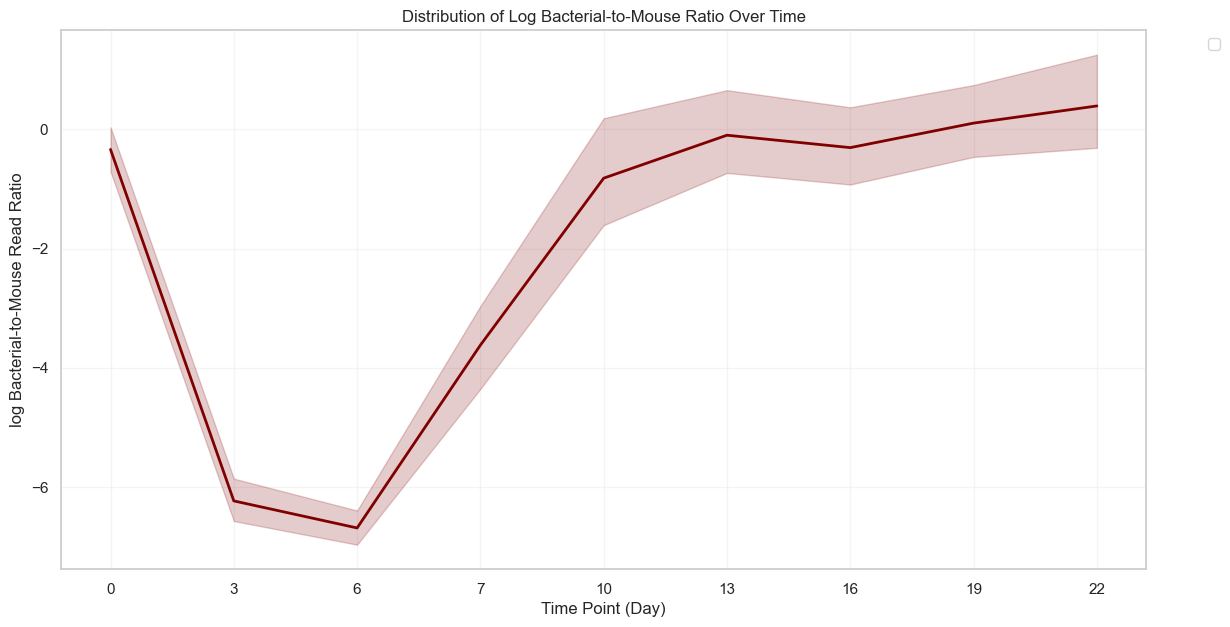

In [24]:
cleaned_Mouse_df = Mouse_df.dropna(subset=['Total_Biomass_plant2', 'Bacterial_read', 'Mouse_read', 'B:M_ratio'])

cleaned_Mouse_df['Log_B:M_ratio'] = np.log(cleaned_Mouse_df['B:M_ratio'] + 1e-9)
cleaned_Mouse_df['Log_Total_Biomass'] = np.log(cleaned_Mouse_df['Total_Biomass_plant2'] + 1e-9)

cleaned_Mouse_df['Days'] = cleaned_Mouse_df['Days'].astype(str)

cleaned_Mouse_df = cleaned_Mouse_df[~cleaned_Mouse_df['Days'].isin([25, 28])]

cleaned_Mouse_df['Days'] = pd.Categorical(cleaned_Mouse_df['Days'], categories=["0", "3", "6", "7", "10", "13", "16", "19", "22"], ordered=True)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_Mouse_df, x="Days", y="Log_B:M_ratio", color='#800000', linewidth=2)

plt.title('Distribution of Log Bacterial-to-Mouse Ratio Over Time')
plt.xlabel('Time Point (Day)')
plt.ylabel('log Bacterial-to-Mouse Read Ratio')
plt.grid(visible=True, alpha=0.2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
baseline_data = cleaned_Mouse_df[cleaned_Mouse_df['Days'] == "0"]['B:M_ratio']

time_points = ["3", "6", "7", "10", "13", "16", "19", "22"]

p_values = []
for time_point in time_points:
    current_data = cleaned_Mouse_df[cleaned_Mouse_df['Days'] == time_point]['B:M_ratio']
    t_stat, p_value = stats.ttest_ind(baseline_data, current_data, equal_var=False)
    p_values.append(p_value)

significance_labels = []
for p in p_values:
    if p < 0.001:
        significance_labels.append('***')
    elif p < 0.01:
        significance_labels.append('**')
    elif p < 0.05:
        significance_labels.append('*')
    else:
        significance_labels.append('')

results_df = pd.DataFrame({
    'Time Point': time_points,
    'P-Value': p_values,
    'Significant': significance_labels
})

print(results_df)

  Time Point   P-Value Significant
0          3  0.000027         ***
1          6  0.000026         ***
2          7  0.000087         ***
3         10  0.058700            
4         13  0.129976            
5         16  0.218189            
6         19  0.076991            
7         22  0.071994            


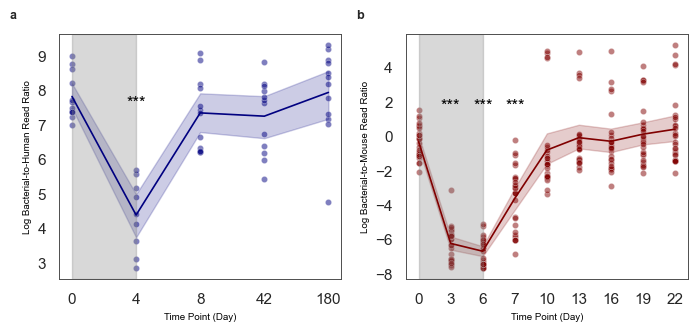

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(7.09, 3.5))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

plt.rcParams.update({'xtick.labelsize': 7, 'ytick.labelsize': 7})

recovery_df['Time point'] = recovery_df['Time point'].str.replace('Day ', '')

recovery_df['Time point'] = pd.Categorical(recovery_df['Time point'], categories=["0", "4", "8", "42", "180"], ordered=True)

sns.lineplot(data=recovery_df, x='Time point', y='Log_B:H read ratio', ax=axes[0], color='#000080', linewidth=1.2)
sns.scatterplot(data=recovery_df, x='Time point', y='Log_B:H read ratio', ax=axes[0], color='#000080', alpha=0.5, s=20)

axes[0].axvspan(0, 1, color='grey', alpha=0.3)

axes[0].text(1, 7.5, '***', color='black', fontsize=12, ha='center')

axes[0].set_xlabel('Time Point (Day)', **font_label)
axes[0].set_ylabel('Log Bacterial-to-Human Read Ratio', **font_label)
axes[0].grid(False)

for spine in axes[0].spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(0.7)


    
sns.lineplot(data=cleaned_Mouse_df, x='Days', y='Log_B:M_ratio', ax=axes[1], color='#800000', linewidth=1.2)
sns.scatterplot(data=cleaned_Mouse_df, x='Days', y='Log_B:M_ratio', ax=axes[1], color='#800000', alpha=0.5, s=20)


axes[1].axvspan(0, 2, color='grey', alpha=0.3)

axes[1].text(1, 1.5, '***', color='black', fontsize=12, ha='center')
axes[1].text(2, 1.5, '***', color='black', fontsize=12, ha='center')
axes[1].text(3, 1.5, '***', color='black', fontsize=12, ha='center')


axes[1].set_xlabel('Time Point (Day)', **font_label)
axes[1].set_ylabel('Log Bacterial-to-Mouse Read Ratio', **font_label)
axes[1].grid(False)

axes[0].text(-0.15, 1.1, 'a', transform=axes[0].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[1].text(-0.15, 1.1, 'b', transform=axes[1].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')


for spine in axes[1].spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(0.7)

plt.tight_layout()

#plt.savefig('figure5.pdf', dpi=300, bbox_inches='tight', format='pdf')

plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:        Log_Copy no./ul   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           4.21e-26
Time:                        10:32:45   Log-Likelihood:                -215.39
No. Observations:                 107   AIC:                             434.8
Df Residuals:                     105   BIC:                             440.1
Df Model:                           1                                         
Covariance Type:            nonrobust  

/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/266023381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Mouse['Log_B:M_ratio'] = np.log(cleaned_Mouse['B:M_ratio'] + 1e-9)
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/266023381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Mouse['Log_Copy no./ul'] = np.log(cleaned_Mouse['Copy no./ul'] + 1e-9)


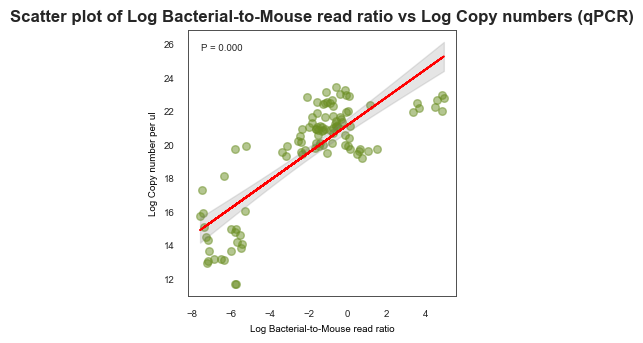

In [30]:
cleaned_Mouse = Mouse_df.dropna(subset=['Copy no./ul', 'B:M_ratio'])

cleaned_Mouse['Log_B:M_ratio'] = np.log(cleaned_Mouse['B:M_ratio'] + 1e-9)
cleaned_Mouse['Log_Copy no./ul'] = np.log(cleaned_Mouse['Copy no./ul'] + 1e-9)


x = cleaned_Mouse['Log_B:M_ratio']
X = sm.add_constant(x)
y = cleaned_Mouse['Log_Copy no./ul']

model = sm.OLS(y, X).fit()

regression_summary = model.summary()
print(regression_summary)

plt.figure(figsize=(3.46, 3.46))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

plt.rcParams.update({'xtick.labelsize': 7, 'ytick.labelsize': 7})

x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = sm.add_constant(x_pred)
predictions = model.get_prediction(X_pred)
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

plt.scatter(cleaned_Mouse['Log_B:M_ratio'], cleaned_Mouse['Log_Copy no./ul'], color='#6B8E23', alpha=0.5, s=30)
plt.plot(cleaned_Mouse['Log_B:M_ratio'], model.fittedvalues, color='red', linewidth=1.2)
plt.plot(x_pred, predicted_means, color='red', linewidth=1.2, label='Regression line')
plt.fill_between(x_pred, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='95% CI')
plt.text(0.05, 0.95, 'P = 0.000', transform=plt.gca().transAxes, fontsize=7, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Log Bacterial-to-Mouse read ratio', **font_label)
plt.ylabel('Log Copy number per ul', **font_label)
plt.title('Scatter plot of Log Bacterial-to-Mouse read ratio vs Log Copy numbers (qPCR)', fontweight='bold')
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(0.7)
    
#plt.savefig('scatterplot_cellcountvsmoisture.png', dpi=300, bbox_inches='tight', format='png') 
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:      Log_Total_Biomass   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     610.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           6.91e-68
Time:                        10:33:04   Log-Likelihood:                -417.73
No. Observations:                 242   AIC:                             839.5
Df Residuals:                     240   BIC:                             846.4
Df Model:                           1                                         
Covariance Type:            nonrobust  

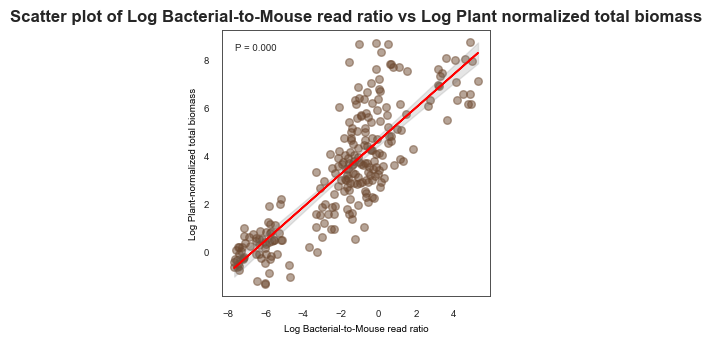

In [31]:
cleaned_Mouse_df['Log_Total_Biomass'] = np.log(cleaned_Mouse_df['Total_Biomass_plant2'] + 1e-9)

x = cleaned_Mouse_df['Log_B:M_ratio']
X = sm.add_constant(x)
y = cleaned_Mouse_df['Log_Total_Biomass']

model = sm.OLS(y, X).fit()

regression_summary = model.summary()
print(regression_summary)

plt.figure(figsize=(3.46, 3.46))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

plt.rcParams.update({'xtick.labelsize': 7, 'ytick.labelsize': 7})

x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = sm.add_constant(x_pred)
predictions = model.get_prediction(X_pred)
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

plt.scatter(cleaned_Mouse_df['Log_B:M_ratio'], cleaned_Mouse_df['Log_Total_Biomass'], color='#6E4A31', alpha=0.5, s=30)
plt.plot(cleaned_Mouse_df['Log_B:M_ratio'], model.fittedvalues, color='red', linewidth=1.2)
plt.plot(x_pred, predicted_means, color='red', linewidth=1.2, label='Regression line')
plt.fill_between(x_pred, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='95% CI')
plt.text(0.05, 0.95, 'P = 0.000', transform=plt.gca().transAxes, fontsize=7, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Log Bacterial-to-Mouse read ratio', **font_label)
plt.ylabel('Log Plant-normalized total biomass', **font_label)
plt.title('Scatter plot of Log Bacterial-to-Mouse read ratio vs Log Plant normalized total biomass', fontweight='bold')
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(0.7)
    
#plt.savefig('scatterplot_cellcountvsmoisture.png', dpi=300, bbox_inches='tight', format='png') 
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


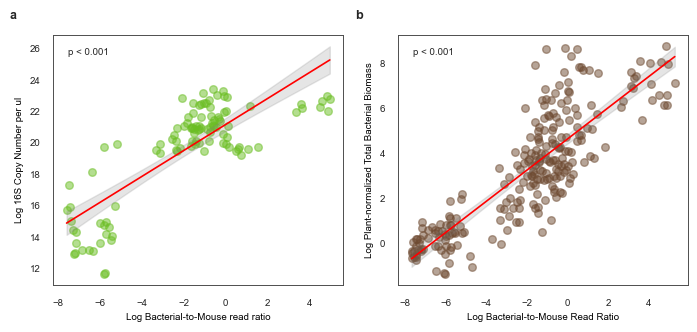

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(7.09, 3.5))  

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

x = cleaned_Mouse['Log_B:M_ratio']
X = sm.add_constant(x)
y = cleaned_Mouse['Log_Copy no./ul']
model = sm.OLS(y, X).fit()
x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = sm.add_constant(x_pred)
predicted_means = model.get_prediction(X_pred).predicted_mean
conf_int = model.get_prediction(X_pred).conf_int()

ax[0].scatter(x, y, color='#6BBE23', alpha=0.5, s=30)
ax[0].plot(x_pred, predicted_means, color='red', linewidth=1.2, label='Regression line')
ax[0].fill_between(x_pred, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='95% CI')
ax[0].text(0.05, 0.95, 'p < 0.001', transform=ax[0].transAxes, fontsize=7, verticalalignment='top')
ax[0].set_xlabel('Log Bacterial-to-Mouse read ratio', **font_label)
ax[0].set_ylabel('Log 16S Copy Number per ul', **font_label)
ax[0].grid(False)

ax[0].text(-0.15, 1.1, 'a', transform=ax[0].transAxes, fontsize=9, fontweight='bold', va='top', ha='left')

for spine in ax[0].spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(0.7)
    
    
x2 = cleaned_Mouse_df['Log_B:M_ratio']
X2 = sm.add_constant(x2)
y2 = cleaned_Mouse_df['Log_Total_Biomass']
model2 = sm.OLS(y2, X2).fit()
x_pred2 = np.linspace(x2.min(), x2.max(), 100)
X_pred2 = sm.add_constant(x_pred2)
predicted_means2 = model2.get_prediction(X_pred2).predicted_mean
conf_int2 = model2.get_prediction(X_pred2).conf_int()

ax[1].scatter(x2, y2, color='#6E4A31', alpha=0.5, s=30)
ax[1].plot(x_pred2, predicted_means2, color='red', linewidth=1.2, label='Regression line')
ax[1].fill_between(x_pred2, conf_int2[:, 0], conf_int2[:, 1], color='gray', alpha=0.2, label='95% CI')
ax[1].text(0.05, 0.95, 'p < 0.001', transform=ax[1].transAxes, fontsize=7, verticalalignment='top')
ax[1].set_xlabel('Log Bacterial-to-Mouse Read Ratio', **font_label)
ax[1].set_ylabel('Log Plant-normalized Total Bacterial Biomass', **font_label)
ax[1].grid(False)

ax[1].text(-0.15, 1.1, 'b', transform=ax[1].transAxes, fontsize=9, fontweight='bold', va='top', ha='left')

for spine in ax[1].spines.values():
    spine.set_edgecolor('#4D4D4D')  # Set to dark grey for a more natural look
    spine.set_linewidth(0.7)

plt.tight_layout()

#plt.savefig('figure3.png', dpi=300, bbox_inches='tight', format='png')  # Use 'pdf' or 'eps' or 'ai' for vector formats

plt.show()

In [33]:
file_path = "/Users/gechlangtang/Documents/University of Washington/IPHG Thesis/Data/Bioml_metagenomic/Bioml_reads.xlsx" 
Bioml_df = pd.read_excel(file_path)

Bioml_df

,sample-id,id,Days,Bacteria read,Human read,Eukaryota,Archaea,B:H ratio,Total reads
0,am-0001,am,1,2940896,156.0,155.0,238.0,18851.897436,2941289.0
1,am-0002,am,2,3471570,114.0,114.0,193.0,30452.368421,3471877.0
2,am-0003,am,3,2094282,55.0,55.0,104.0,38077.854545,2094441.0
3,am-0004,am,4,2386437,89.0,88.0,155.0,26813.898876,2386680.0
4,am-0005,am,5,2433274,53.0,47.0,147.0,45910.830189,2433468.0
...,...,...,...,...,...,...,...,...,...
396,ao-0086,ao,86,3961903,162.0,419.0,161.0,24456.191358,3962483.0
397,ao-0087,ao,87,4618588,128.0,246.0,128.0,36082.718750,4618962.0
398,ao-0088,ao,88,3937448,138.0,138.0,199.0,28532.231884,3937785.0
399,ao-0089,ao,89,4040278,166.0,165.0,309.0,24339.024096,4040752.0


/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/335072355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'Log_B:H_ratio'] = np.log(cleaned_Bioml_df['B:H ratio'] + 1e-9)


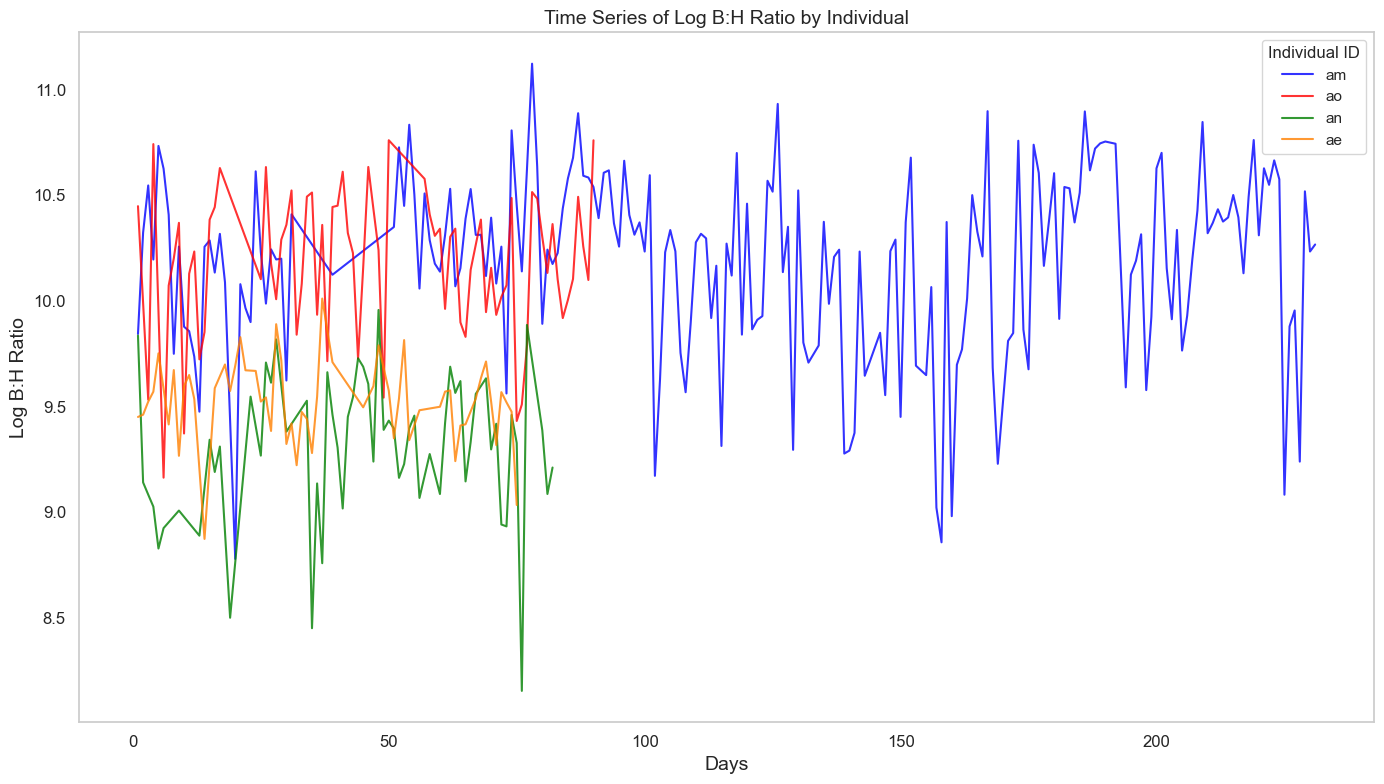

In [39]:
cleaned_Bioml_df = Bioml_df.dropna(subset=['Bacteria read','Human read', 'B:H ratio', 'Eukaryota', 'Archaea', 'Total reads'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()
cleaned_Bioml_df.loc[:, 'Log_B:H_ratio'] = np.log(cleaned_Bioml_df['B:H ratio'] + 1e-9)

colors = {
    'am': (0, 0, 1),      # Blue
    'ae': (1, 0.5, 0),    # Orange
    'an': (0, 0.5, 0),    # Green
    'ao': (1, 0, 0)       # Red
}

# Plot time series for each individual based on 'ID'
#individuals = cleaned_Bioml_df['id'].unique()

plt.figure(figsize=(14, 8))

for individual in ['am', 'ao', 'an', 'ae']:
    individual_data = cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]
    plt.plot(individual_data['Days'], individual_data['Log_B:H_ratio'], 
             label=individual, alpha=0.8, color=colors[individual])

plt.xlabel('Days', fontsize=14)
plt.ylabel('Log B:H Ratio', fontsize=14)
plt.title('Time Series of Log B:H Ratio by Individual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Individual ID')
plt.grid(False)
plt.tight_layout()
plt.show()

/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/637398902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'B:T ratio'] = cleaned_Bioml_df['Bacteria read']/cleaned_Bioml_df['Total reads']
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/637398902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'Log_B:T_ratio'] = np.log(cleaned_Bioml_df['B:T ratio'] + 1e-9)


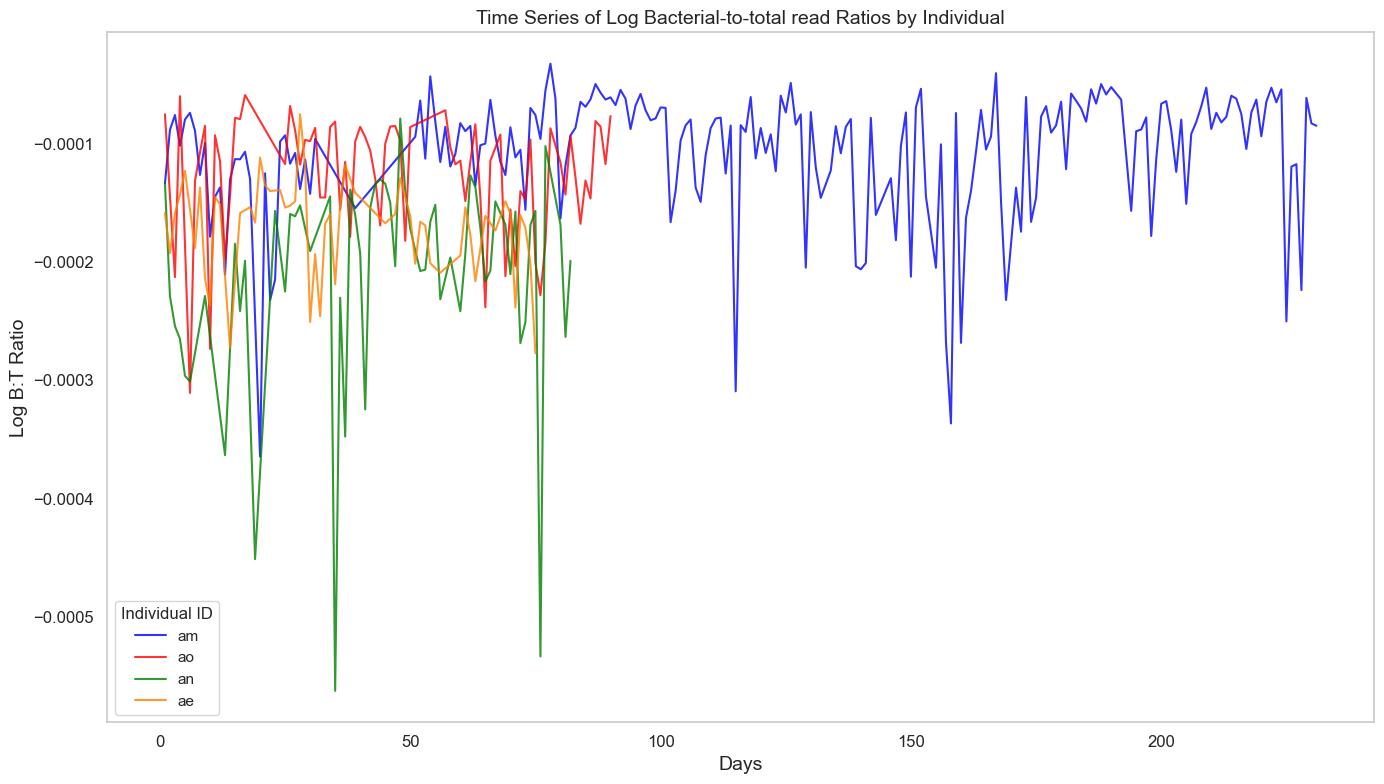

In [45]:
cleaned_Bioml_df = Bioml_df.dropna(subset=['Bacteria read','Human read', 'B:H ratio', 'Eukaryota', 'Archaea', 'Total reads'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()
cleaned_Bioml_df.loc[:, 'B:T ratio'] = cleaned_Bioml_df['Bacteria read']/cleaned_Bioml_df['Total reads']
cleaned_Bioml_df.loc[:, 'Log_B:T_ratio'] = np.log(cleaned_Bioml_df['B:T ratio'] + 1e-9)


colors = {
    'am': (0, 0, 1),      # Blue
    'ae': (1, 0.5, 0),    # Orange
    'an': (0, 0.5, 0),    # Green
    'ao': (1, 0, 0)       # Red
}

plt.figure(figsize=(14, 8))

for individual in ['am', 'ao', 'an', 'ae']:
    individual_data = cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]
    plt.plot(individual_data['Days'], individual_data['Log_B:T_ratio'], 
             label=individual, alpha=0.8, color=colors[individual])

plt.xlabel('Days', fontsize=14)
plt.ylabel('Log B:T Ratio', fontsize=14)
plt.title('Time Series of Log Bacterial-to-total read Ratios by Individual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Individual ID')
plt.grid(False)
plt.tight_layout()
plt.show()

/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/2284321760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/2284321760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'Log_H:T_ratio'] = np.log(cleaned_Bioml_df['H:T ratio'] + 1e-9)


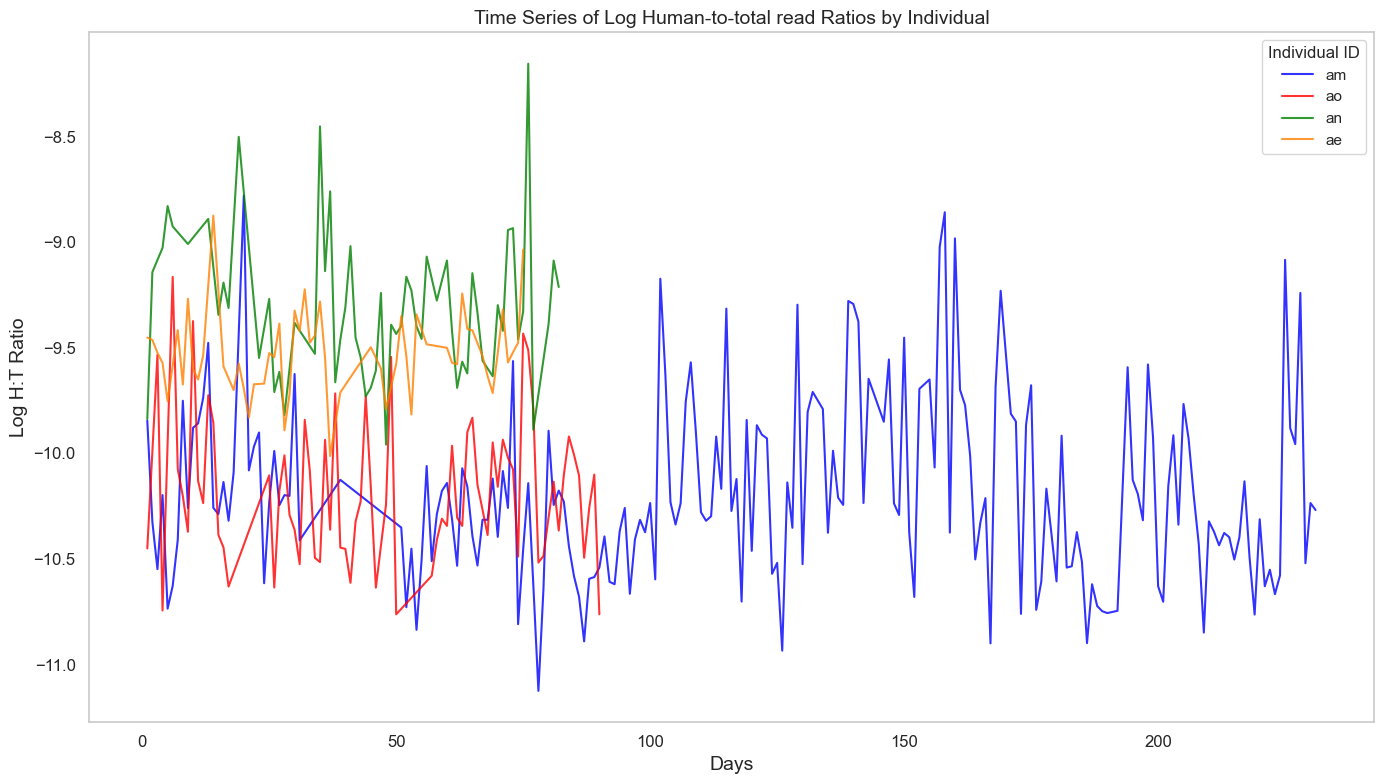

In [49]:
cleaned_Bioml_df = Bioml_df.dropna(subset=['Bacteria read','Human read', 'B:H ratio', 'Eukaryota', 'Archaea', 'Total reads'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()
cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']
cleaned_Bioml_df.loc[:, 'Log_H:T_ratio'] = np.log(cleaned_Bioml_df['H:T ratio'] + 1e-9)


colors = {
    'am': (0, 0, 1),      # Blue
    'ae': (1, 0.5, 0),    # Orange
    'an': (0, 0.5, 0),    # Green
    'ao': (1, 0, 0)       # Red
}


plt.figure(figsize=(14, 8))

for individual in ['am', 'ao', 'an', 'ae']:
    individual_data = cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]
    plt.plot(individual_data['Days'], individual_data['Log_H:T_ratio'], 
             label=individual, alpha=0.8, color=colors[individual])

plt.xlabel('Days', fontsize=14)
plt.ylabel('Log H:T Ratio', fontsize=14)
plt.title('Time Series of Log Human-to-total read Ratios by Individual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Individual ID')
plt.grid(False)
plt.tight_layout()
plt.show()

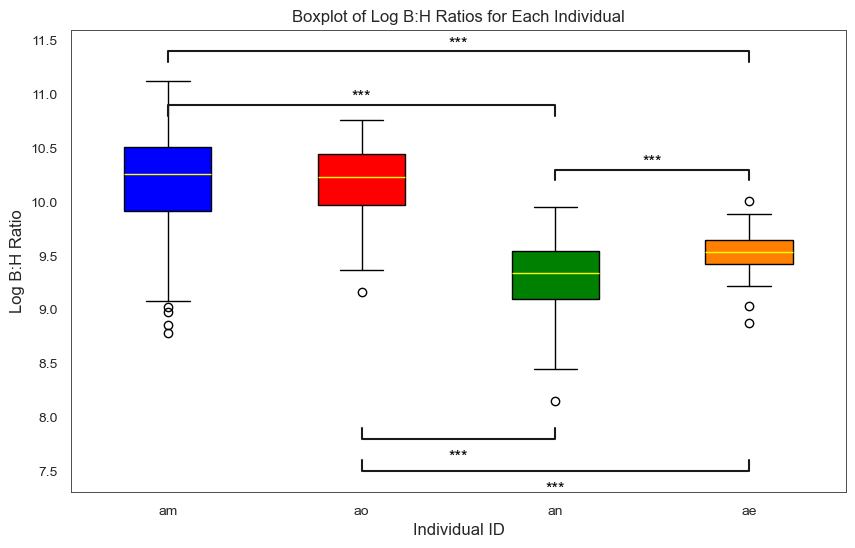

In [40]:
individuals = ['am', 'ao', 'an', 'ae']
colors = [(0, 0, 1), (1, 0, 0), (0, 0.5, 0), (1, 0.5, 0)]
median_color = 'yellow'

plt.figure(figsize=(10, 6))
log_bh_data = [cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]['Log_B:H_ratio'] for individual in individuals]
box = plt.boxplot(log_bh_data, labels=individuals, patch_artist=True,
                  medianprops=dict(color=median_color))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

y_lines = {
    ('am', 'ae'): 11.4,
    ('am', 'an'): 10.9,
    ('ae', 'an'): 10.3,
    ('ae', 'ao'): 7.5,  
    ('an', 'ao'): 7.8   
}

significance_labels = {
    ('am', 'ae'): '***',
    ('am', 'an'): '***',
    ('ae', 'an'): '***',
    ('ae', 'ao'): '***',
    ('an', 'ao'): '***'
}


for (ind1, ind2), y in y_lines.items():
    x1, x2 = individuals.index(ind1) + 1, individuals.index(ind2) + 1
    if (ind1, ind2) == ('ae', 'ao'):
        plt.plot([x1, x1, x2, x2], [y + 0.1, y, y, y + 0.1], lw=1.5, c='k')
        plt.text((x1 + x2) * 0.5, y - 0.1, significance_labels[(ind1, ind2)], ha='center', va='top', color='black', fontsize=12)
    elif (ind1, ind2) == ('an', 'ao'):
        plt.plot([x1, x1, x2, x2], [y + 0.1, y, y, y + 0.1], lw=1.5, c='k')
        plt.text((x1 + x2) * 0.5, y - 0.1, significance_labels[(ind1, ind2)], ha='center', va='top', color='black', fontsize=12)
    else:
        plt.plot([x1, x1, x2, x2], [y - 0.1, y, y, y - 0.1], lw=1.5, c='k')
        plt.text((x1 + x2) * 0.5, y, significance_labels[(ind1, ind2)], ha='center', va='bottom', color='black', fontsize=12)


plt.title("Boxplot of Log B:H Ratios for Each Individual")
plt.xlabel("Individual ID")
plt.ylabel("Log B:H Ratio")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

plt.show()

In [43]:
ttest_results = {}

individual_pairs = [('am', 'ae'), ('am', 'an'), ('am', 'ao'), ('ae', 'an'), ('ae', 'ao'), ('an', 'ao')]

for ind1, ind2 in individual_pairs:
    data1 = cleaned_Bioml_df[cleaned_Bioml_df['id'] == ind1]['Log_B:H_ratio']
    data2 = cleaned_Bioml_df[cleaned_Bioml_df['id'] == ind2]['Log_B:H_ratio']
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    
    if p_value < 0.000166:
        significance = '***'
    elif p_value < 0.00166:
        significance = '**'
    elif p_value < 0.0083:
        significance = '*'
    else:
        significance = None 
    
    result = {'t_stat': t_stat, 'p_value': p_value}
    if significance:
        result['significance'] = significance  
    ttest_results[(ind1, ind2)] = result

for pair, result in ttest_results.items():
    print(f"Comparison between {pair[0]} and {pair[1]}:")
    significance_display = f", significance = {result['significance']}" if 'significance' in result else ""
    print(f" t-statistic = {result['t_stat']:.4f}, p-value = {result['p_value']:.4e}{significance_display}")


Comparison between am and ae:
 t-statistic = 16.6739, p-value = 4.7712e-40, significance = ***
Comparison between am and an:
 t-statistic = 16.5798, p-value = 3.5068e-33, significance = ***
Comparison between am and ao:
 t-statistic = 0.2115, p-value = 8.3278e-01
Comparison between ae and an:
 t-statistic = 4.3262, p-value = 3.6568e-05, significance = ***
Comparison between ae and ao:
 t-statistic = -13.7059, p-value = 2.6363e-26, significance = ***
Comparison between an and ao:
 t-statistic = -14.7061, p-value = 2.1678e-29, significance = ***


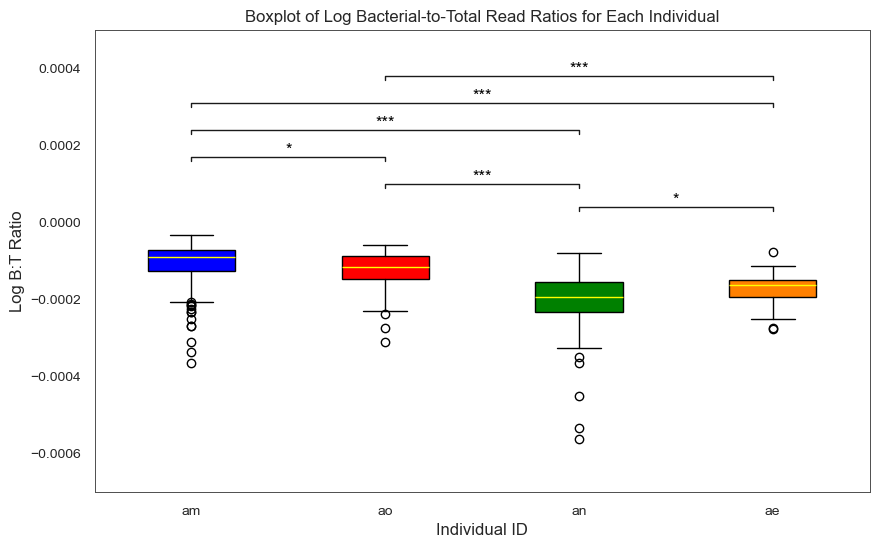

In [46]:
individuals = ['am', 'ao', 'an', 'ae']
colors = [(0, 0, 1), (1, 0, 0), (0, 0.5, 0), (1, 0.5, 0)]
median_color = 'yellow'

plt.figure(figsize=(10, 6))
log_bh_data = [cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]['Log_B:T_ratio'] for individual in individuals]
box = plt.boxplot(log_bh_data, labels=individuals, patch_artist=True,
                  medianprops=dict(color=median_color))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

y_lines = {
    ('am', 'ae'): 0.00031,
    ('am', 'an'): 0.00024,
    ('am', 'ao'): 0.00017,   
    ('ao', 'an'): 0.00010,
    ('an', 'ae'): 0.00004,
    ('ao', 'ae'): 0.00038   
}

significance_labels = {
    ('am', 'ae'): '***',
    ('am', 'an'): '***',
    ('am', 'ao'): '*',
    ('ao', 'an'): '***',
    ('an', 'ae'): '*',
    ('ao', 'ae'): '***'
}

for (ind1, ind2), y in y_lines.items():
    x1, x2 = individuals.index(ind1) + 1, individuals.index(ind2) + 1
    plt.plot([x1, x1, x2, x2], [y - 0.00001, y, y, y - 0.00001], lw=1, c='k')
    significance = significance_labels[(ind1, ind2)]
    plt.text((x1 + x2) * 0.5, y, significance, ha='center', va='bottom', color='black', fontsize=12)


plt.ylim(-0.0007, 0.0005)

plt.title("Boxplot of Log Bacterial-to-Total Read Ratios for Each Individual")
plt.xlabel("Individual ID")
plt.ylabel("Log B:T Ratio")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

plt.show()


In [47]:
ttest_results = {}

individual_pairs = [('am', 'ae'), ('am', 'an'), ('am', 'ao'), ('ae', 'an'), ('ae', 'ao'), ('an', 'ao')]

num_tests = len(individual_pairs)

for ind1, ind2 in individual_pairs:
    data1 = cleaned_Bioml_df[cleaned_Bioml_df['id'] == ind1]['Log_B:T_ratio']
    data2 = cleaned_Bioml_df[cleaned_Bioml_df['id'] == ind2]['Log_B:T_ratio']
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    
    corrected_p_value = p_value * num_tests  # Multiply by the number of tests

    if corrected_p_value < 0.000166:
        significance = '***'
    elif corrected_p_value < 0.00166:
        significance = '**'
    elif corrected_p_value < 0.0083:
        significance = '*'
    else:
        significance = None  

    result = {'t_stat': t_stat, 'p_value': p_value, 'corrected_p_value': corrected_p_value}
    if significance:
        result['significance'] = significance 
    ttest_results[(ind1, ind2)] = result

for pair, result in ttest_results.items():
    print(f"Comparison between {pair[0]} and {pair[1]}:")
    significance_display = f", significance = {result['significance']}" if 'significance' in result else ""
    print(f" t-statistic = {result['t_stat']:.4f}, p-value = {result['p_value']:.4e}, corrected p-value = {result['corrected_p_value']:.4e}{significance_display}")


Comparison between am and ae:
 t-statistic = 10.0306, p-value = 1.6512e-17, corrected p-value = 9.9073e-17, significance = ***
Comparison between am and an:
 t-statistic = 8.5602, p-value = 1.0975e-12, corrected p-value = 6.5852e-12, significance = ***
Comparison between am and ao:
 t-statistic = 2.7380, p-value = 7.0106e-03, corrected p-value = 4.2064e-02, significance = *
Comparison between ae and an:
 t-statistic = 3.0680, p-value = 2.8897e-03, corrected p-value = 1.7338e-02, significance = *
Comparison between ae and ao:
 t-statistic = -5.7790, p-value = 5.3490e-08, corrected p-value = 3.2094e-07, significance = ***
Comparison between an and ao:
 t-statistic = -6.5345, p-value = 3.5006e-09, corrected p-value = 2.1003e-08, significance = ***


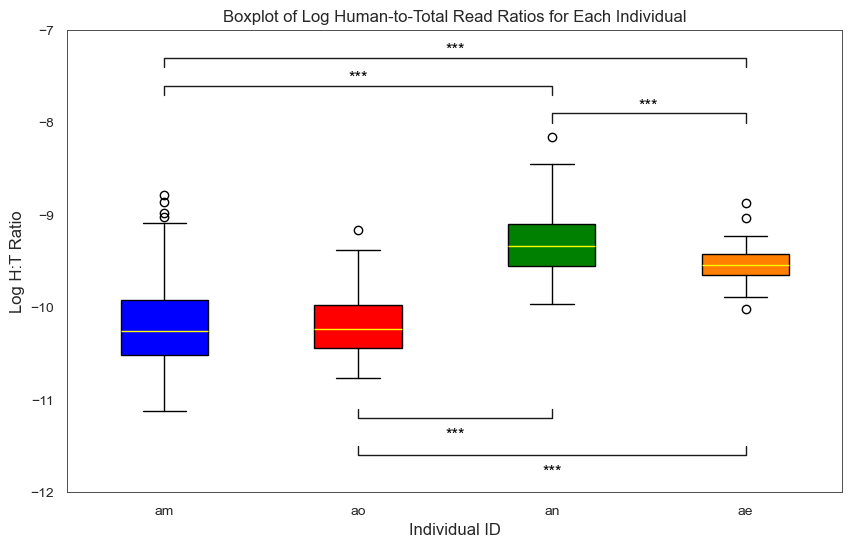

In [51]:
individuals = ['am', 'ao', 'an', 'ae']
colors = [(0, 0, 1), (1, 0, 0), (0, 0.5, 0), (1, 0.5, 0)]
median_color = 'yellow'

plt.figure(figsize=(10, 6))
log_ht_data = [cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]['Log_H:T_ratio'] for individual in individuals]
box = plt.boxplot(log_ht_data, labels=individuals, patch_artist=True,
                  medianprops=dict(color=median_color))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

y_lines = {
    ('am', 'ae'): -7.3,
    ('am', 'an'): -7.6,
    ('ao', 'an'): -11.2,  
    ('an', 'ae'): -7.9,
    ('ao', 'ae'): -11.6  
}


significance_labels = {
    ('am', 'ae'): '***',
    ('am', 'an'): '***',
    ('ao', 'an'): '***',
    ('an', 'ae'): '***',
    ('ao', 'ae'): '***'
}

for (ind1, ind2), y in y_lines.items():
    x1, x2 = individuals.index(ind1) + 1, individuals.index(ind2) + 1
    if (ind1, ind2) == ('ao', 'an') or (ind1, ind2) == ('ao', 'ae'):
        plt.plot([x1, x1, x2, x2], [y + 0.1, y, y, y + 0.1], lw=1, c='k')
        plt.text((x1 + x2) * 0.5, y - 0.1, significance_labels[(ind1, ind2)], ha='center', va='top', color='black', fontsize=12)
    else:
        plt.plot([x1, x1, x2, x2], [y - 0.1, y, y, y - 0.1], lw=1, c='k')
        plt.text((x1 + x2) * 0.5, y, significance_labels[(ind1, ind2)], ha='center', va='bottom', color='black', fontsize=12)

plt.title("Boxplot of Log Human-to-Total Read Ratios for Each Individual")
plt.xlabel("Individual ID")
plt.ylabel("Log H:T Ratio")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

plt.ylim(-12, -7)

plt.show()


In [52]:
ttest_results = {}

individual_pairs = [('am', 'ae'), ('am', 'an'), ('am', 'ao'), ('ae', 'an'), ('ae', 'ao'), ('an', 'ao')]

num_tests = len(individual_pairs)

for ind1, ind2 in individual_pairs:
    data1 = cleaned_Bioml_df[cleaned_Bioml_df['id'] == ind1]['Log_H:T_ratio']
    data2 = cleaned_Bioml_df[cleaned_Bioml_df['id'] == ind2]['Log_H:T_ratio']
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    
    corrected_p_value = p_value * num_tests  

    if corrected_p_value < 0.000166:
        significance = '***'
    elif corrected_p_value < 0.00166:
        significance = '**'
    elif corrected_p_value < 0.0083:
        significance = '*'
    else:
        significance = None  

    result = {'t_stat': t_stat, 'p_value': p_value, 'corrected_p_value': corrected_p_value}
    if significance:
        result['significance'] = significance  
    ttest_results[(ind1, ind2)] = result

for pair, result in ttest_results.items():
    print(f"Comparison between {pair[0]} and {pair[1]}:")
    significance_display = f", significance = {result['significance']}" if 'significance' in result else ""
    print(f" t-statistic = {result['t_stat']:.4f}, p-value = {result['p_value']:.4e}, corrected p-value = {result['corrected_p_value']:.4e}{significance_display}")


Comparison between am and ae:
 t-statistic = -16.6745, p-value = 4.7442e-40, corrected p-value = 2.8465e-39, significance = ***
Comparison between am and an:
 t-statistic = -16.5811, p-value = 3.4708e-33, corrected p-value = 2.0825e-32, significance = ***
Comparison between am and ao:
 t-statistic = -0.2111, p-value = 8.3307e-01, corrected p-value = 4.9984e+00
Comparison between ae and an:
 t-statistic = -4.3264, p-value = 3.6537e-05, corrected p-value = 2.1922e-04, significance = ***
Comparison between ae and ao:
 t-statistic = 13.7069, p-value = 2.6223e-26, corrected p-value = 1.5734e-25, significance = ***
Comparison between an and ao:
 t-statistic = 14.7075, p-value = 2.1495e-29, corrected p-value = 1.2897e-28, significance = ***


In [53]:
cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']
cleaned_Bioml_df.loc[:, 'Log_H:T_ratio'] = np.log(cleaned_Bioml_df['H:T ratio'] + 1e-9)

log_ht_stats = cleaned_Bioml_df.groupby('id')['Log_H:T_ratio'].agg(
    mean='mean',
    std_dev='std',
    median='median',
    percentile_25=lambda x: x.quantile(0.25),
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
)


print("Statistics of Log H:T Ratio for each individual:")
print(log_ht_stats)

Statistics of Log H:T Ratio for each individual:
         mean   std_dev     median  percentile_25  percentile_75        min  \
id                                                                            
ae  -9.527115  0.196338  -9.538635      -9.649945      -9.420768 -10.011990   
am -10.190758  0.431378 -10.257961     -10.509609      -9.915707 -11.123806   
an  -9.305780  0.346896  -9.338305      -9.547012      -9.099442  -9.957981   
ao -10.180199  0.343434 -10.231034     -10.442571      -9.973744 -10.761517   

         max  
id            
ae -8.874106  
am -8.779666  
an -8.154923  
ao -9.164216  


/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/501607693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/501607693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'Log_H:T_ratio'] = np.log(cleaned_Bioml_df['H:T ratio'] + 1e-9)


In [54]:
cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']
mean_relative_HT = cleaned_Bioml_df.groupby('id')['H:T ratio'].mean()
print(mean_relative_HT)

id
ae    0.000074
am    0.000042
an    0.000097
ao    0.000040
Name: H:T ratio, dtype: float64


/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/1168707312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']


In [55]:
data_HT = {
    'id': ['ae', 'am', 'an', 'ao'],
    'mean': [-9.527115, -10.190758, -9.305780, -10.180199],
    'std_dev': [0.196338, 0.431378, 0.346896, 0.343434]
}

df_HT = pd.DataFrame(data_HT)

cross_sectional_mean_HT = df_HT['mean'].mean()
cross_sectional_std_HT = df_HT['mean'].std()

print("Cross-sectional Mean:", cross_sectional_mean_HT)
print("Cross-sectional Standard Deviation:", cross_sectional_std_HT)


Cross-sectional Mean: -9.800963000000001
Cross-sectional Standard Deviation: 0.4531221381754225


/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/1624095410.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df['Log_B:H_ratio'] = np.log(cleaned_Bioml_df['B:H ratio'] + 1e-9)
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/1624095410.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']
/var/folders/rp/4l0lx8891cv3t7y1bg_tj6qr0000gn/T/ipykernel_51072/16240

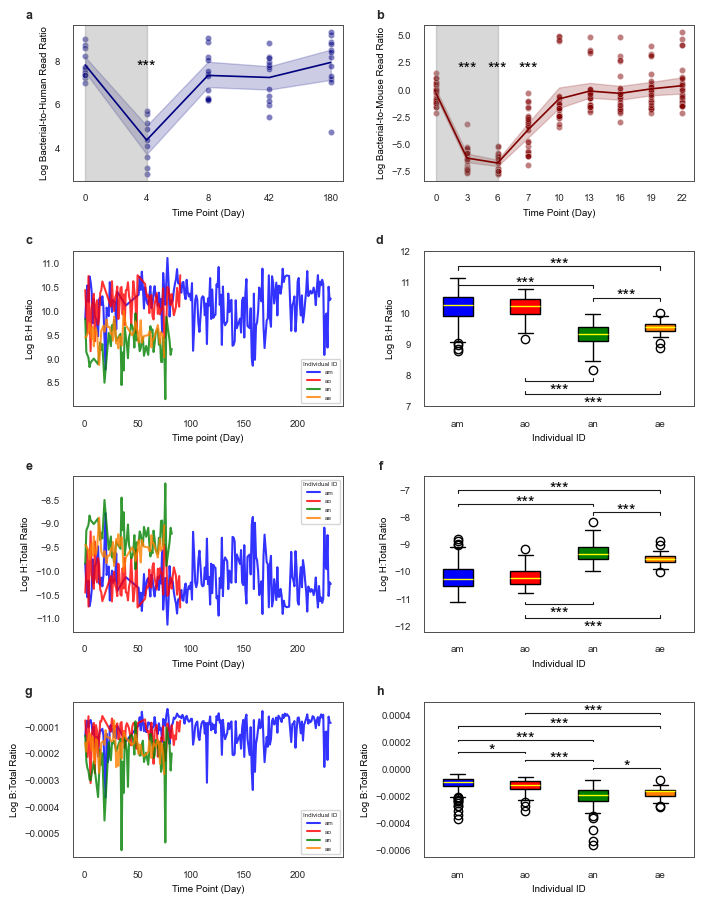

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [56]:
fig, axes = plt.subplots(4, 2, figsize=(7.2, 9.2))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

plt.rcParams.update({'xtick.labelsize': 7, 'ytick.labelsize': 7})

recovery_df['Time point'] = recovery_df['Time point'].str.replace('Day ', '')
recovery_df['Time point'] = pd.Categorical(recovery_df['Time point'], categories=["0", "4", "8", "42", "180"], ordered=True)

sns.lineplot(data=recovery_df, x='Time point', y='Log_B:H read ratio', ax=axes[0, 0], color='#000080', linewidth=1.2)
sns.scatterplot(data=recovery_df, x='Time point', y='Log_B:H read ratio', ax=axes[0, 0], color='#000080', alpha=0.5, s=20)

axes[0, 0].axvspan(0, 1, color='grey', alpha=0.3)
axes[0, 0].text(1, 7.5, '***', color='black', fontsize=12, ha='center')
axes[0, 0].set_xlabel('Time Point (Day)', **font_label)
axes[0, 0].set_ylabel('Log Bacterial-to-Human Read Ratio', **font_label)
axes[0, 0].grid(False)

for spine in axes[0, 0].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

    
    
sns.lineplot(data=cleaned_Mouse_df, x='Days', y='Log_B:M_ratio', ax=axes[0, 1], color='#800000', linewidth=1.2)
sns.scatterplot(data=cleaned_Mouse_df, x='Days', y='Log_B:M_ratio', ax=axes[0, 1], color='#800000', alpha=0.5, s=20)

axes[0, 1].axvspan(0, 2, color='grey', alpha=0.3)
axes[0, 1].text(1, 1.5, '***', color='black', fontsize=12, ha='center')
axes[0, 1].text(2, 1.5, '***', color='black', fontsize=12, ha='center')
axes[0, 1].text(3, 1.5, '***', color='black', fontsize=12, ha='center')
axes[0, 1].set_xlabel('Time Point (Day)', **font_label)
axes[0, 1].set_ylabel('Log Bacterial-to-Mouse Read Ratio', **font_label)
axes[0, 1].grid(False)

axes[0, 0].text(-0.15, 1.1, 'a', transform=axes[0, 0].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[0, 1].text(-0.15, 1.1, 'b', transform=axes[0, 1].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[1, 0].text(-0.15, 1.1, 'c', transform=axes[1, 0].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[1, 1].text(-0.15, 1.1, 'd', transform=axes[1, 1].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[2, 0].text(-0.15, 1.1, 'e', transform=axes[2, 0].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[2, 1].text(-0.15, 1.1, 'f', transform=axes[2, 1].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[3, 0].text(-0.15, 1.1, 'g', transform=axes[3, 0].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')
axes[3, 1].text(-0.15, 1.1, 'h', transform=axes[3, 1].transAxes, fontsize=9, fontweight='bold', va='top', ha='right')


for spine in axes[0, 1].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

    
    
cleaned_Bioml_df = Bioml_df.dropna(subset=['Human read', 'B:H ratio'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()
cleaned_Bioml_df['Log_B:H_ratio'] = np.log(cleaned_Bioml_df['B:H ratio'] + 1e-9)

colors = {'am': (0, 0, 1), 'ae': (1, 0.5, 0), 'an': (0, 0.5, 0), 'ao': (1, 0, 0)}

for individual in ['am', 'ao', 'an', 'ae']:
    individual_data = cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]
    axes[1, 0].plot(individual_data['Days'], individual_data['Log_B:H_ratio'], 
                    label=individual, alpha=0.8, color=colors[individual])
     
    
axes[1, 0].set_xlabel('Time point (Day)', **font_label)
axes[1, 0].set_ylabel('Log B:H Ratio', **font_label)
axes[1, 0].legend(title='Individual ID', fontsize=4.5, title_fontsize=4.5)
axes[1, 0].grid(False)

for spine in axes[1, 0].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

    
individuals = ['am', 'ao', 'an', 'ae']
box_colors = [(0, 0, 1), (1, 0, 0), (0, 0.5, 0), (1, 0.5, 0)]
median_color = 'yellow'

log_bh_data = [cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]['Log_B:H_ratio'] for individual in individuals]
box = axes[1, 1].boxplot(log_bh_data, labels=individuals, patch_artist=True,  # Explicitly set labels to match 'individuals' order
                         medianprops=dict(color=median_color))


for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

y_lines = {
    ('am', 'ae'): 11.5,
    ('am', 'an'): 10.9,
    ('ae', 'an'): 10.5,
    ('ae', 'ao'): 7.4,  
    ('an', 'ao'): 7.8   
}


significance_labels = {
    ('am', 'ae'): '***',
    ('am', 'an'): '***',
    ('ae', 'an'): '***',
    ('ae', 'ao'): '***',
    ('an', 'ao'): '***'
}
    

for (ind1, ind2), y in y_lines.items():
    x1, x2 = individuals.index(ind1) + 1, individuals.index(ind2) + 1
    if (ind1, ind2) == ('ae', 'ao'):
        axes[1, 1].plot([x1, x1, x2, x2], [y + 0.1, y, y, y + 0.1], lw=0.8, c='k')
        axes[1, 1].text((x1 + x2) * 0.5, y - 0.09, significance_labels[(ind1, ind2)], ha='center', va='top', color='black', fontsize=12)
    elif (ind1, ind2) == ('an', 'ao'):
        axes[1, 1].plot([x1, x1, x2, x2], [y + 0.1, y, y, y + 0.1], lw=0.8, c='k')
        axes[1, 1].text((x1 + x2) * 0.5, y - 0.09, significance_labels[(ind1, ind2)], ha='center', va='top', color='black', fontsize=12)
    else:
        axes[1, 1].plot([x1, x1, x2, x2], [y - 0.1, y, y, y - 0.1], lw=0.8, c='k')
        axes[1, 1].text((x1 + x2) * 0.5, y - 0.21, significance_labels[(ind1, ind2)], ha='center', va='bottom', color='black', fontsize=12)

axes[1, 1].set_ylim(7, 12)         
    

axes[1, 1].set_xlabel("Individual ID", **font_label)
axes[1, 1].set_ylabel("Log B:H Ratio", **font_label)
axes[1, 1].grid(False)

for spine in axes[1, 1].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)


    
cleaned_Bioml_df = Bioml_df.dropna(subset=['Bacteria read','Human read', 'B:H ratio', 'Eukaryota', 'Archaea', 'Total reads'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()
cleaned_Bioml_df.loc[:, 'H:T ratio'] = cleaned_Bioml_df['Human read']/cleaned_Bioml_df['Total reads']
cleaned_Bioml_df.loc[:, 'Log_H:T_ratio'] = np.log(cleaned_Bioml_df['H:T ratio'] + 1e-9)


colors = {
    'am': (0, 0, 1),      # Blue
    'ae': (1, 0.5, 0),    # Orange
    'an': (0, 0.5, 0),    # Green
    'ao': (1, 0, 0)       # Red
}


for individual in ['am', 'ao', 'an', 'ae']:
    individual_data = cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]
    axes[2, 0].plot(individual_data['Days'], individual_data['Log_H:T_ratio'], 
             label=individual, alpha=0.8, color=colors[individual])

axes[2, 0].set_xlabel('Time Point (Day)', **font_label)
axes[2, 0].set_ylabel('Log H:Total Ratio', **font_label)
axes[2, 0].legend(title='Individual ID', fontsize=4.5, title_fontsize=4.5)
axes[2, 0].grid(False)
    
for spine in axes[2, 0].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)     

    
individuals = ['am', 'ao', 'an', 'ae']
colors = [(0, 0, 1), (1, 0, 0), (0, 0.5, 0), (1, 0.5, 0)]
median_color = 'yellow'

plt.figure(figsize=(10, 6))
log_ht_data = [cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]['Log_H:T_ratio'] for individual in individuals]
box = axes[2, 1].boxplot(log_ht_data, labels=individuals, patch_artist=True,
                  medianprops=dict(color=median_color))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


y_lines = {
    ('am', 'ae'): -7.0,
    ('am', 'an'): -7.5,
    ('ao', 'an'): -11.2,  
    ('an', 'ae'): -7.8,
    ('ao', 'ae'): -11.7  
}

significance_labels = {
    ('am', 'ae'): '***',
    ('am', 'an'): '***',
    ('ao', 'an'): '***',
    ('an', 'ae'): '***',
    ('ao', 'ae'): '***'
}

for (ind1, ind2), y in y_lines.items():
    x1, x2 = individuals.index(ind1) + 1, individuals.index(ind2) + 1
    if (ind1, ind2) == ('ao', 'an') or (ind1, ind2) == ('ao', 'ae'):
        axes[2, 1].plot([x1, x1, x2, x2], [y + 0.1, y, y, y + 0.1], lw=0.8, c='k')
        axes[2, 1].text((x1 + x2) * 0.5, y - 0.09, significance_labels[(ind1, ind2)], ha='center', va='top', color='black', fontsize=12)
    else:
        axes[2, 1].plot([x1, x1, x2, x2], [y - 0.1, y, y, y - 0.1], lw=0.8, c='k')
        axes[2, 1].text((x1 + x2) * 0.5, y - 0.24, significance_labels[(ind1, ind2)], ha='center', va='bottom', color='black', fontsize=12)

axes[2, 1].set_ylim(-12.2, -6.5)
        
axes[2, 1].set_xlabel("Individual ID", **font_label)
axes[2, 1].set_ylabel("Log H:Total Ratio", **font_label)
axes[2, 1].grid(False)


for spine in axes[2, 1].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7) 

    
    
cleaned_Bioml_df = Bioml_df.dropna(subset=['Bacteria read','Human read', 'B:H ratio', 'Eukaryota', 'Archaea', 'Total reads'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()
cleaned_Bioml_df.loc[:, 'B:T ratio'] = cleaned_Bioml_df['Bacteria read']/cleaned_Bioml_df['Total reads']
cleaned_Bioml_df.loc[:, 'Log_B:T_ratio'] = np.log(cleaned_Bioml_df['B:T ratio'] + 1e-9)


colors = {
    'am': (0, 0, 1),      
    'ae': (1, 0.5, 0),    
    'an': (0, 0.5, 0),    
    'ao': (1, 0, 0)       
}


for individual in ['am', 'ao', 'an', 'ae']:
    individual_data = cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]
    axes[3, 0].plot(individual_data['Days'], individual_data['Log_B:T_ratio'], 
             label=individual, alpha=0.8, color=colors[individual])

axes[3, 0].set_xlabel('Time Point (Day)', **font_label)
axes[3, 0].set_ylabel('Log B:Total Ratio', **font_label)
axes[3, 0].legend(title='Individual ID', fontsize=4.5, title_fontsize=4.5)
axes[3, 0].grid(False)    


for spine in axes[3, 0].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7) 

    
    
individuals = ['am', 'ao', 'an', 'ae']
colors = [(0, 0, 1), (1, 0, 0), (0, 0.5, 0), (1, 0.5, 0)]
median_color = 'yellow'


plt.figure(figsize=(10, 6))
log_bh_data = [cleaned_Bioml_df[cleaned_Bioml_df['id'] == individual]['Log_B:T_ratio'] for individual in individuals]
box = axes[3, 1].boxplot(log_bh_data, labels=individuals, patch_artist=True,
                  medianprops=dict(color=median_color))


for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

y_lines = {
    ('am', 'ae'): 0.00032,
    ('am', 'an'): 0.00022,
    ('am', 'ao'): 0.00013,   
    ('ao', 'an'): 0.00007,
    ('an', 'ae'): 0.00001,
    ('ao', 'ae'): 0.00042    
}


significance_labels = {
    ('am', 'ae'): '***',
    ('am', 'an'): '***',
    ('am', 'ao'): '*',
    ('ao', 'an'): '***',
    ('an', 'ae'): '*',
    ('ao', 'ae'): '***'
}


for (ind1, ind2), y in y_lines.items():
    x1, x2 = individuals.index(ind1) + 1, individuals.index(ind2) + 1
    axes[3, 1].plot([x1, x1, x2, x2], [y - 0.00001, y, y, y - 0.00001], lw=0.8, c='k')
    significance = significance_labels[(ind1, ind2)]
    axes[3, 1].text((x1 + x2) * 0.5, y - 0.00005, significance, ha='center', va='bottom', color='black', fontsize=12)

axes[3, 1].set_ylim(-0.00065, 0.0005)


axes[3, 1].set_xlabel("Individual ID", **font_label)
axes[3, 1].set_ylabel("Log B:Total Ratio", **font_label)
axes[3, 1].grid(False)


for spine in axes[3, 1].spines.values():
    spine.set_edgecolor('#4D4D4D')
    spine.set_linewidth(0.7)

fig.tight_layout()
#fig.savefig('figure5_2-2.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()  


In [57]:
cleaned_Bioml_df = Bioml_df.dropna(subset=['Bacteria read','Human read', 'B:H ratio', 'Eukaryota', 'Archaea', 'Total reads'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()

cv_results = cleaned_Bioml_df.groupby('id')['B:H ratio'].apply(lambda x: (x.std() / x.mean()) * 100)
cv_results = cv_results.reindex(["am", "ao", "an", "ae"])
cv_results


id
am    37.977822
ao    31.246471
an    31.584365
ae    19.028599
Name: B:H ratio, dtype: float64

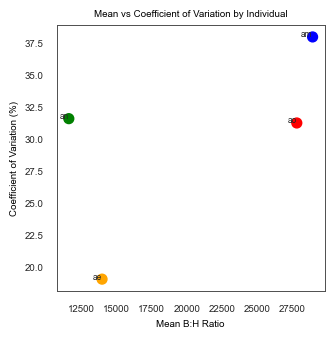

In [59]:
cleaned_Bioml_df = Bioml_df.dropna(subset=['Bacteria read','Human read', 'B:H ratio', 'Eukaryota', 'Archaea', 'Total reads'])
cleaned_Bioml_df.columns = cleaned_Bioml_df.columns.str.strip()

mean_results = cleaned_Bioml_df.groupby('id')['B:H ratio'].mean()
mean_results = mean_results.reindex(["am", "ao", "an", "ae"])

cv_results = cleaned_Bioml_df.groupby('id')['B:H ratio'].apply(lambda x: (x.std() / x.mean()) * 100)
cv_results = cv_results.reindex(["am", "ao", "an", "ae"])

plt.figure(figsize=(3.46, 3.46))

font_label = {'fontsize': 7, 'color': 'black'}
font_ticks = {'fontsize': 7, 'color': 'black'}

plt.scatter(mean_results, cv_results, color=['blue', 'red', 'green', 'orange'], s=50)  
plt.xlabel('Mean B:H Ratio', **font_label)
plt.ylabel('Coefficient of Variation (%)', **font_label)
plt.title('Mean vs Coefficient of Variation by Individual', **font_label)


for i, txt in enumerate(mean_results.index):
    plt.annotate(txt, (mean_results[i], cv_results[i]), fontsize=6, ha='right')  

plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(0.7) 

#plt.savefig('Supplementary_figure.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
